In [142]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision.datasets as datasets
from skimage import io
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
import time
from PIL import Image
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
import cv2

from torchvision.utils import save_image 

(864, 486)


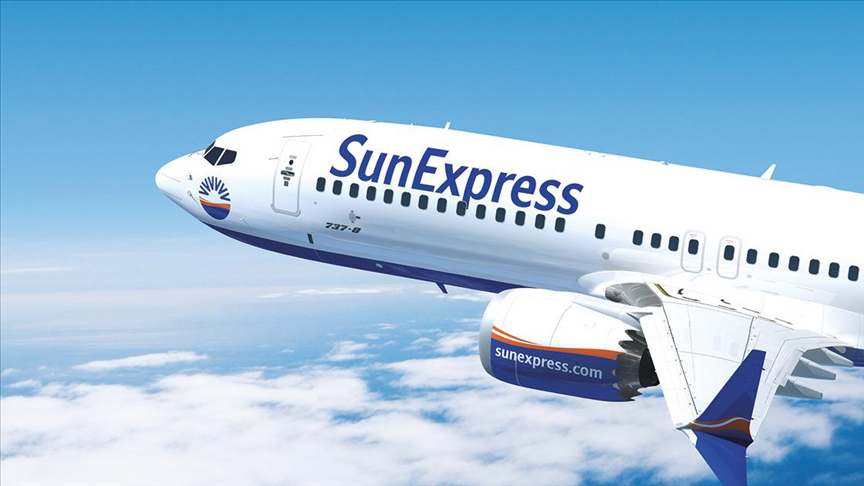

In [11]:
img=Image.open("airplane.jpg")
print(img.size)
img


# transforms.RandomCrop

In [41]:
# transform for rectangular crop
transform = transforms.RandomCrop((200,250),padding=50,padding_mode='constant')
# transform for square crop
transform_square = transforms.RandomCrop(250)

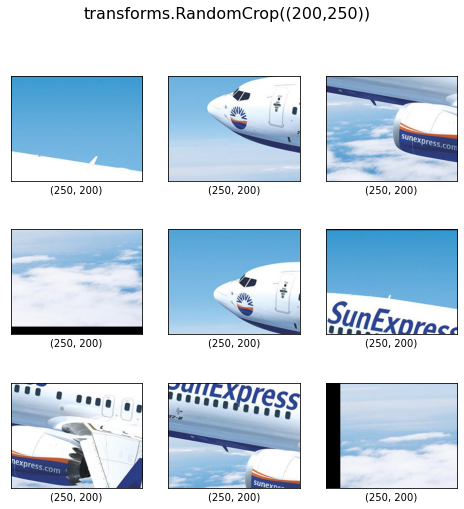

In [42]:
img_new=transform(img)

F=plt.figure(figsize=(8,8))
plt.suptitle("transforms.RandomCrop((200,250))",fontsize=16)

for i in range(9):
    plt.subplot(3,3,i+1)
    img_new=transform(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(img_new.size)
    plt.imshow(img_new)


# transforms.RandomHorizontalFlip

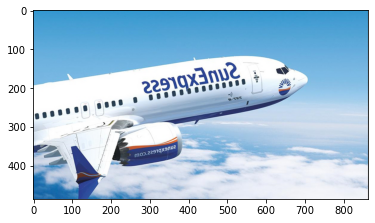

In [66]:
# p=probability of horizontal rotation of the picture,1 certain rotation, takes a value between (0,1)
transform=transforms.RandomHorizontalFlip(p=1)
img_new=transform(img)
plt.imshow(img_new)    

# transforms.RandomHorizontalFlip

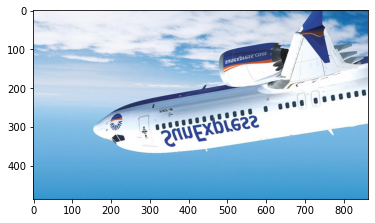

In [67]:
# p=the probability that the picture will rotate horizontally, if it is 1, it will definitely return, it takes a value between (0,1)
transform=transforms.RandomVerticalFlip(p=1)
img_new=transform(img)
plt.imshow(img_new)    

# transforms.ColorJitter

ColorJitter is a type of image data augmentation where we randomly change the brightness, contrast and saturation of an image.

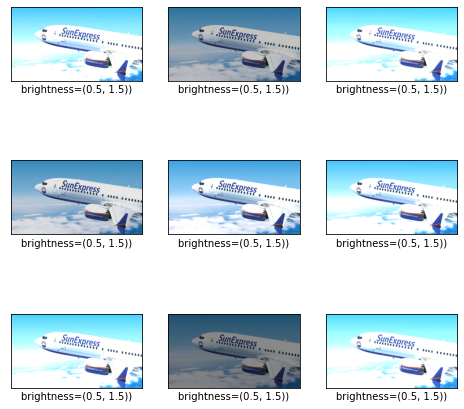

In [104]:
"""Args:
    brightness (float or tuple of float (min, max)): How much to jitter brightness.
        brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness]
        or the given [min, max]. Should be non negative numbers.
    contrast (float or tuple of float (min, max)): How much to jitter contrast.
        contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast]
        or the given [min, max]. Should be non negative numbers.
    saturation (float or tuple of float (min, max)): How much to jitter saturation.
        saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation]
        or the given [min, max]. Should be non negative numbers.
    hue (float or tuple of float (min, max)): How much to jitter hue.
        hue_factor is chosen uniformly from [-hue, hue] or the given [min, max].
        Should have 0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5.
        To jitter hue, the pixel values of the input image has to be non-negative for conversion to HSV space;
        thus it does not work if you normalize your image to an interval with negative values,
        or use an interpolation that generates negative values before using this function."""

F=plt.figure(figsize=(8,8))
for i in range(9):
    transform=transforms.ColorJitter(brightness=(0.5,1.5))
    img_new=transform(img)
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"brightness={transform.brightness})")
    plt.imshow(img_new)
    


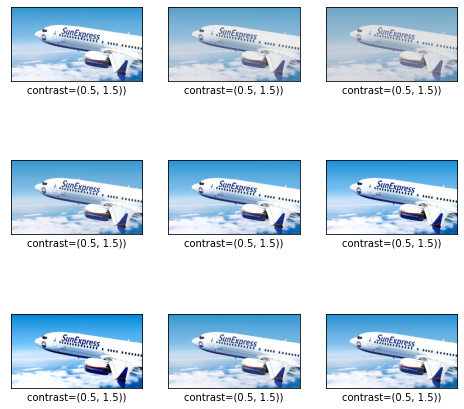

In [107]:
F=plt.figure(figsize=(8,8))

for i in range(9):
    transform=transforms.ColorJitter(contrast=(0.5,1.5))
    img_new=transform(img)
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"contrast={transform.contrast})")
    plt.imshow(img_new)
    

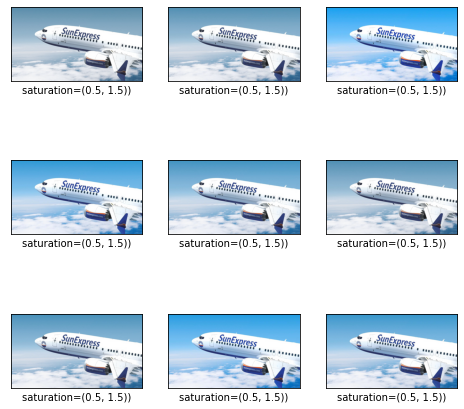

In [114]:
F=plt.figure(figsize=(8,8))

for i in range(9):
    transform=transforms.ColorJitter(saturation=(0.5,1.5))
    img_new=transform(img)
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"saturation={transform.saturation})")
    plt.imshow(img_new)
    

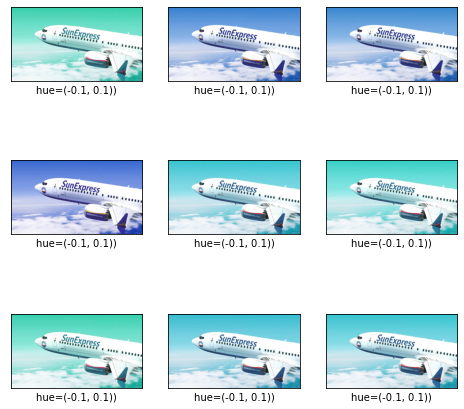

In [115]:
F=plt.figure(figsize=(8,8))

for i in range(9):
    transform=transforms.ColorJitter(hue=(-0.1,0.1))
    img_new=transform(img)
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"hue={transform.hue})")
    plt.imshow(img_new)
    

# transforms.RandomRotation

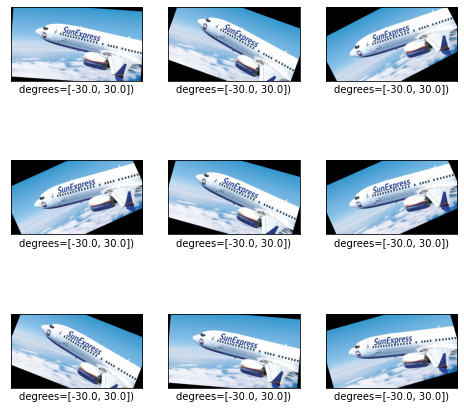

In [119]:
F=plt.figure(figsize=(8,8))

for i in range(9):
    
    transform=transforms.RandomRotation(30)
    img_new=transform(img)
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"degrees={transform.degrees})")
    plt.imshow(img_new)
    

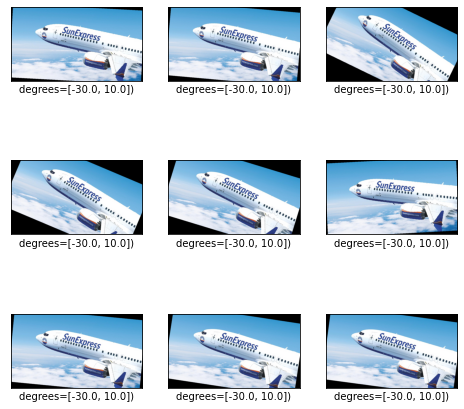

In [125]:
F=plt.figure(figsize=(8,8))

for i in range(9):
    
    transform=transforms.RandomRotation((-30,10))
    img_new=transform(img)
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"degrees={transform.degrees})")
    plt.imshow(img_new)

# transforms.Grayscale

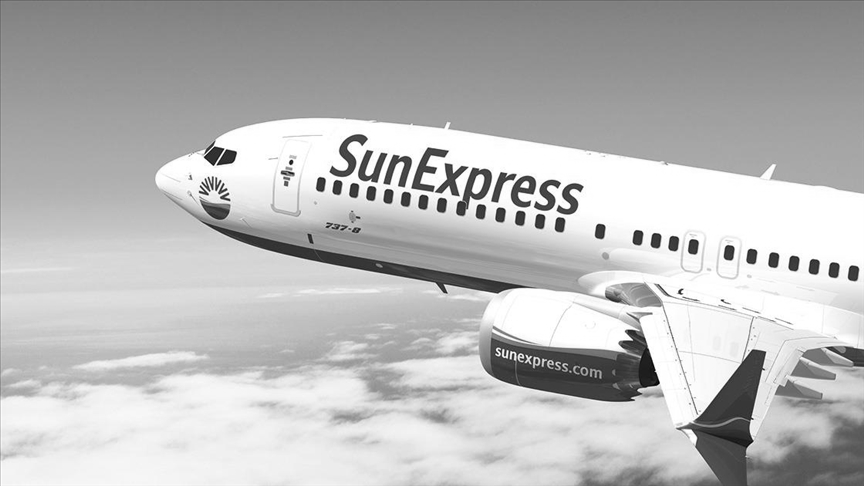

In [134]:
transform=transforms.RandomGrayscale(p=1)
img_new=transform(img)
img_new

In [225]:
img_cv=cv2.imread("airplane.jpg")
img_cv=cv2.circle(img_cv,(int(img_cv.shape[1]/2),int(img_cv.shape[0]/2)),5,(255,0,0),-1,8)
cv2.imshow("resim",img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

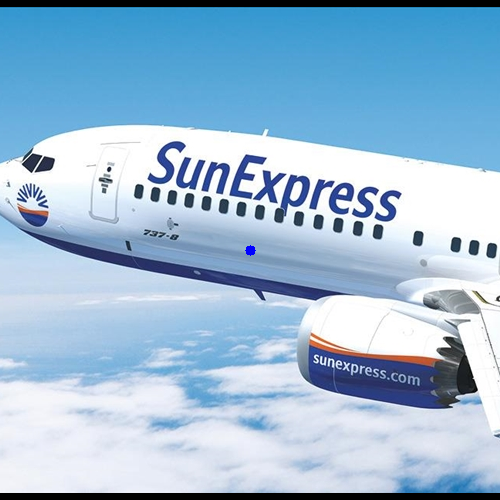

In [226]:
transform=transforms.CenterCrop(500)
img_cv=cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)
img=Image.fromarray(img_cv)
img_new=transform(img)
img_new

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_path='hymenoptera_data/train'

data_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset=datasets.ImageFolder(root=train_path,transform=data_transforms)

print(len(dataset))

244


In [ ]:
img_num=0
for img,label in dataset:
    img_path='augmented_images/img'+str(img_num)+'.png'
    save_image(img,img_path)
    img_num+=1